In [188]:
import cv2
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd 
import numpy as np
from color_util import *
from PIL import Image
from sklearn.cluster import KMeans
from IPython.display import display
import matplotlib.pyplot as plt
import time
from os import path
#from color_cluster import *

#937528.jpg

In [258]:
image=cv2.imread("748148.jpg")
cluster_df=pd.read_csv("748148.csv",header=0,sep="^")

#image=cv2.imread("554316.jpg")
#cluster_df=pd.read_csv("554316.csv",header=0,sep="^")

In [260]:
cluster_df=cluster_df.sort_values('frequency',ascending=True)
cluster_df.shape[0]

10

In [71]:
s='[ 56 29 146]'
np.array(list(s[1:-1].split( )),dtype=int)

array([ 56,  29, 146])

In [4]:
#color=[]
#for i in range(10):
##    string=cluster_df.iloc[i]['color_center']
  #  print(i, string)
  #  color=color.append((np.array(list(s[1:-1].split( )),dtype=int))[::-1])
    
color=np.asarray([(np.array(list(s[1:-1].split( )),dtype=int))[::-1] 
       for s in cluster_df.color_center])
color

array([[144, 133, 112],
       [146,  29,  56],
       [188,  69, 107],
       [224, 105, 147],
       [ 52,  86,  32],
       [175, 174, 150],
       [138, 175, 118],
       [204, 196, 180],
       [ 85, 124,  64],
       [111, 151,  90]])

<BarContainer object of 10 artists>

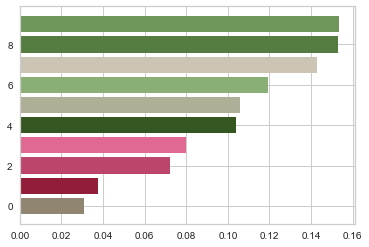

In [87]:
plt.barh(range(10),cluster_df.frequency,color=color/255.)
#cluster_df
#np.shape(color)
#color

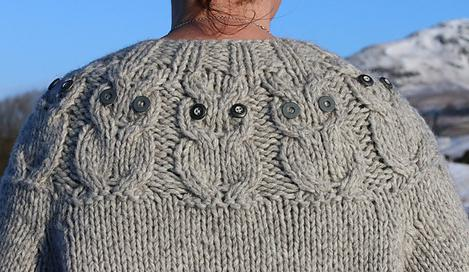

In [76]:
image=(cv2.imread("554316.jpg"))
img=Image.fromarray(flip_rgb(image),"RGB")
img

In [74]:
#image=cv2.imread("748148.jpg")
image=flip_rgb(cv2.imread("554316.jpg"))
image=cv2.imread("554316.jpg")
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,9))#,metric="silhouette")
image=image.reshape([image.shape[0]*image.shape[1],3])
image=remove_background(image)

In [131]:
type((2,9))

tuple

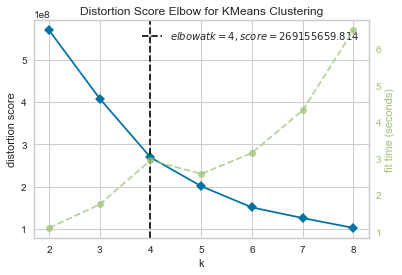

In [51]:
%matplotlib inline
start_time=time.time()
visualizer.fit(image)        # Fit the data to the visualizer
visualizer.show()  
end_time=time.time()
#print('time',end_time-start_time)

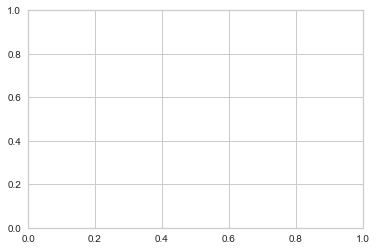

In [134]:
visualizer?
#visualizer.elbow_score_

In [126]:
image=cv2.imread("748148.jpg")
#image=image.reshape([image.shape[0]*image.shape[1],3])
image=prepare_image(image)
kmeans=KMeans(n_clusters=4).fit(image)

labels=kmeans.labels_
c=kmeans.cluster_centers_

In [136]:
(unique, counts)=np.unique(labels, return_counts=True)
counts
np.sort(counts)

array([2847, 3457, 5367, 7861])

<BarContainer object of 4 artists>

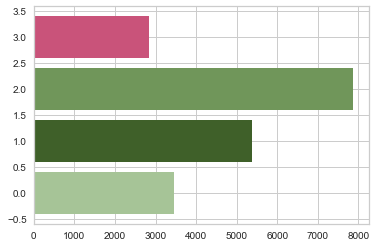

In [103]:
plt.barh(range(4),counts,color=c/255.)

In [128]:
counts/np.sum(counts)

array([0.40246775, 0.27477985, 0.1457608 , 0.1769916 ])

In [120]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=3, min_samples=10).fit(image)

In [121]:
l=clustering.labels_
(unique, counts)=np.unique(l, return_counts=True)
print(unique)
print(counts)

[-1  0  1  2  3  4  5  6]
[ 2989  1894 14597    10    10    14     9     9]


In [122]:
print( np.average(image[l==1],axis=0))

[101.81242721 139.46214976  81.37185723]


In [255]:
def kmeans_simple_cluster(image,nc=10):
	model=KMeans(n_clusters=nc,)
	kmeans=model.fit(image)
	labels=kmeans.labels_
	colors=kmeans.cluster_centers_
	(unique, counts)=np.unique(labels, return_counts=True)
	counts=counts/np.sum(counts)
	return {c:color for c,color in zip(counts,colors )}

def kmeans_find_n_cluster(image,Nrange=(2,9)):
	model = KMeans()
	visualizer = KElbowVisualizer(model,
                                  k=Nrange,showbool=False)
	visualizer.fit(image) 
	return visualizer.elbow_value_

def kmeans_op(image,Nrange=(2,9)):
    k=kmeans_find_n_cluster(image,Nrange)
    print(k)
    colors=kmeans_simple_cluster(image,nc=k)
    return colors

def color_visualizer(colors):
    count=colors[:,3]
    colors=colors[:,:3]
    plt.barh(np.arange(len(count)),count,color=colors/255.)
    plt.show()
    return True

def color_cluster(image,nc=10):

	start_time=time.time()
	wid=int(image.shape[1]*0.6)
	height=int(image.shape[0]*0.6)

	image=cv2.resize(image,(wid,height), interpolation = cv2.INTER_AREA)
	image=flip_rgb(image)
	#img = Image.fromarray(image,"RGB")
	#img.save('small2.jpg')

	image=image.reshape([image.shape[0]*image.shape[1],3])
	image=remove_background(image)
	imagesize=image.shape[0]
	print("compressed image size: ",imagesize)
	cluster = KMedoids(n_clusters=nc,random_state=0)
	label=cluster.fit_predict(image)

	#y_pre=KMedoids.fit_predict(image)
	C = cluster.cluster_centers_
	(unique, counts)=np.unique(label, return_counts=True)
	frequency={u:c for(u,c) in zip(unique, counts)}

	output=[]
	for i in range(nc):
		output.append([counts[i]/imagesize,i,str(C[i])])

	# string to array: [int(s) for s in string[1:-1].split(' ')]

	df = pd.DataFrame(output, columns = ['frequency', 'label','color_center']) 
	end_time=time.time()
	print('time',end_time-start_time)
	return df

def remove_background(image):
	index_del=[]
	for i in range(image.shape[0]):
		if image[i][0]>235 and image[i][1]>235 and image[i][2]>235:
			index_del.append(i)
		if image[i][0]<50 and image[i][1]<50 and image[i][2]<50:
			index_del.append(i)

	if index_del:
		image=np.delete(image,index_del,axis=0)
	return image

def prepare_image(image):	
    wid=int(image.shape[1]*0.6)
    height=int(image.shape[0]*0.6)

    image=cv2.resize(image,(wid,height), interpolation = cv2.INTER_AREA)
    wid=image.shape[1]
    height=image.shape[0]
    image=image[int(wid*0.15):int(wid*0.85),int(height*0.15):int(height*0.85)]

    image=flip_rgb(image)
    img=Image.fromarray((image),"RGB")
    display(img)
    #img = Image.fromarray(image,"RGB")
    #img.save('small2.jpg')

    image=image.reshape([image.shape[0]*image.shape[1],3])
    image=remove_background(image)

    return image

In [183]:
visualizer?

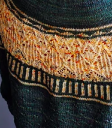

4
[0.24579643 0.16339366 0.29662431 0.2941856 ]
[array([135.74582463,  86.41283925,  48.47129436]), array([214.78930818, 176.44339623, 130.68396226]), array([61.17611424, 63.20856772, 63.01298139]), array([178.10165794, 131.54581152,  84.39136126])]


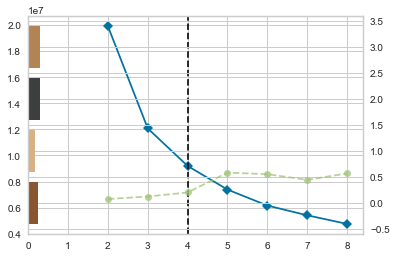

True

In [187]:
image=(cv2.imread("test.png"))
image=prepare_image(image)
colors=kmeans_op(image)
color_visualizer(colors)

In [150]:
counts

array([7861, 5367, 2847, 3457])

In [189]:
image

array([[ 91,  55,  23],
       [120,  78,  43],
       [116,  70,  30],
       ...,
       [ 30,  59,  68],
       [ 11,  47,  57],
       [ 58,  85, 100]], dtype=uint8)

In [234]:
def kmeans_simple_cluster(image,nc=10):
        model=KMeans(n_clusters=nc)
        kmeans=model.fit(image)
        labels=kmeans.labels_
        colors=np.asarray((kmeans.cluster_centers_))
        (unique, counts)=np.unique(labels, return_counts=True)
        counts=np.array(counts/np.sum(counts))
        counts=counts.reshape((4,1))
        colors=np.hstack((colors,counts))
        return colors

In [238]:
c=kmeans_simple_cluster(image,nc=4)

In [243]:
c=c[:,:3].astype('uint8')

In [244]:
c

array([[ 61,  63,  63],
       [178, 131,  84],
       [135,  86,  48],
       [214, 176, 130]], dtype=uint8)

In [253]:

fname='../marcc/colors/cluster_dict/'+str(474069)+'.txt'
r=np.loadtxt(fname)


ValueError: could not convert string to float: '{0.32063492063492066:'

In [248]:
a.append(c)

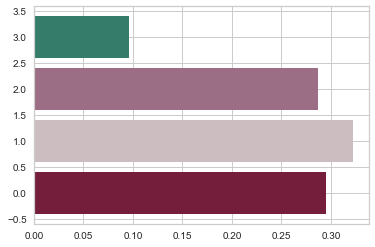

True

In [257]:
x=np.asarray([[1.16207558e+02, 2.95798082e+01, 5.89503666e+01 ,2.95405180e-01],
 [2.04171518e+02, 1.88791060e+02 ,1.93448025e+02 ,3.21971596e-01],
 [1.55102445e+02 ,1.09651339e+02 ,1.33043655e+02 ,2.86883876e-01],
 [5.29526316e+01 ,1.24321053e+02 ,1.07147368e+02 ,9.57393484e-02]])
color_visualizer(x)